In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

## Exploratory Data Analysis

Briefly, both of the train data and test data are a sort of $28 \times 28$ gray scale images. The first column of the input represents what the number is and the rest 784 columns represents a $28 \times 28$ matrix.

There are 42000 training images:

In [2]:
train = pd.read_csv('./dataset/train.csv')

train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And 10000 test images:

In [3]:
test = pd.read_csv('./dataset/test.csv')

test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here are some examples of these images:

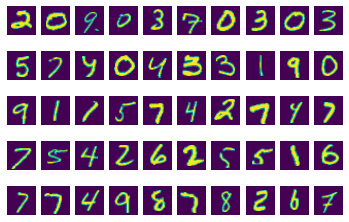

In [4]:
fig, axes = plt.subplots(5, 10);

for i in range(0, 5):
    for j in range(0, 10):
        axes[i][j].axis('off')
        axes[i][j].imshow(np.mat(test.iloc[i * 10 + j, np.arange(0, 784)]).reshape(28, 28))

## Neural Network Models using PyTorch

### Dataset Loaders

In [23]:
from torch.utils.data import Dataset, DataLoader

class TrainDataset(Dataset):
    
    def __init__(self):
        self.df = pd.read_csv("./dataset/train.csv")
    
    def __getitem__(self, index):
        image = torch.from_numpy(np.array(self.df.iloc[index, np.arange(1, 785)]))
        label = self.df.loc[index, 'label']
        
        return image, label
        
    def __len__(self):
        return self.df.shape[0]
    
class TestDataset(Dataset):
    
    def __init__(self):
        self.df = pd.read_csv("./dataset/test.csv")
        
    def __getitem__(self, index):
        image = torch.from_numpy(np.array(self.df.iloc[index, np.arange(0, 784)]))
        
        return image, index
    
    def __len__(self):
        return self.df.shape[0]
    
train_loader = DataLoader(dataset = TrainDataset(), batch_size = 512, shuffle = True)
test_loader = DataLoader(dataset = TestDataset(), batch_size = 512, shuffle = True)

### Multi-Layer Perceptron Model

In [6]:
from torch.nn import Module, Linear
from torch.nn.functional import relu

class MLP(Module):
    
    def __init__(self):
        super(MLP, self).__init__()
        
        self.fc1 = Linear(784, 784)
        self.fc2 = Linear(784, 784)
        self.fc3 = Linear(784, 10)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(relu(out))
        out = self.fc3(relu(out))
        
        return out

### Convolutional Neural Network Model

In [28]:
from torch.nn import Module, Linear, Sequential, Conv2d,BatchNorm2d, ReLU, MaxPool2d
from torch.nn.functional import relu

class CNN(Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        # First convolution & pooling layer.
        # (28 x 28 x 1) -> (14 x 14 x 16).
        self.layer1 = Sequential(
            Conv2d(1, 16, kernel_size = 3, stride = 1, padding = 1),
            BatchNorm2d(16),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        
        # Second convolution & pooling layer.
        # (14 x 14 x 16) -> (7 x 7 x 32).
        self.layer2 = Sequential(
            Conv2d(16, 32, kernel_size = 5, stride = 1, padding = 2),
            BatchNorm2d(32),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        
        # Fully connected Layer.
        # (7 x 7 x 32) -> 10
        self.fc = Linear(7 * 7 * 32, 10)
        
    def forward(self, x):
        out = self.layer1(x.reshape(-1, 1, 28, 28))
        out = self.layer2(out)
        out = self.fc(out.reshape(-1, 7 * 7 * 32))
        
        return out

### Model Training

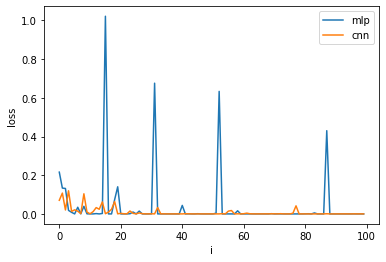

In [27]:
import os
import json
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

def train(model, path = None, ax = None, label = 'default', epoch = 10):
    
    if ax is None:
        ax = plt.subplot()
        
    if os.path.isfile('./models/' + label + '.ckpt'):
        
        model.load_state_dict(torch.load('./models/' + label + '.ckpt'))
        
        with open('./models/' + label + '.losses.json', 'r') as file:
            
            losses = json.load(file)
                
            ax.plot(losses, label = label)

            ax.set_xlabel('i')
            ax.set_ylabel('loss')
        
        return model
    
    device = torch.device('cuda')
    model = model.to(device)
    
    criterion = CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr = 0.001)
    
    losses = []
    
    print('Start training {}.'.format(label))
    
    for i in np.arange(0, epoch):
        for images, labels in train_loader:
            
            outputs = model(images.to(device).float())
            loss = criterion(outputs, labels.to(device))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        losses.append(loss.cpu().item())
        
        print('[{}] loss: {}'.format(i + 1, loss))
    
    print(losses)
    
    ax.plot(losses, label = label)
    
    ax.set_xlabel('i')
    ax.set_ylabel('loss')
    
    torch.save(model.state_dict(), './models/' + label + '.ckpt')

    with open('./models/' + label + '.losses.json', 'w') as file:
        json.dump(losses, file)
    
    return model

ax = plt.subplot()

mlp = train(MLP(), ax = ax, label = 'mlp', epoch = 100)
cnn = train(CNN(), ax = ax, label = 'cnn', epoch = 100)

ax.legend()

plt.show()

### Prediction

In [25]:
def predict(model, path = None):
    
    device = torch.device('cuda')
    model = model.to(device)
    
    predictions = {}
    
    with torch.no_grad():
        for images, labels in test_loader:
            
            outputs = model(images.to(device).float())

            _, prediction = torch.max(outputs.data, 1)

            prediction = prediction.cpu().numpy()

            for i in range(0, len(prediction)):
                predictions[labels.numpy()[i]] = prediction[i]

    submission = pd.DataFrame({ 'ImageId': np.arange(1, len(predictions) + 1) })

    for index in predictions.keys():    
        submission.loc[index, 'Label'] = predictions[index]

    submission['Label'] = pd.to_numeric(submission['Label'], downcast = 'integer')

    if path is not None:
        submission.to_csv(path, index = False)

    return submission

submission_mlp = predict(mlp, './dataset/submission_mlp.csv')
submission_cnn = predict(cnn, './dataset/submission_cnn.csv')

### Evaluation

,score
mlp,117
cnn,40


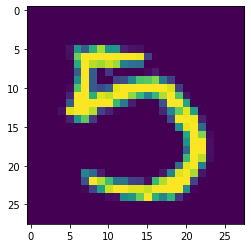

In [26]:
from torch.utils.data import Dataset, DataLoader

class MnistDataset(Dataset):
    
    def __init__(self, train = True):
        
        self.df = pd.read_csv('./dataset/mnist/test.csv', names = np.concatenate((np.array(['label']), np.arange(0, 784))))
        
    def __getitem__(self, index):
        image = torch.from_numpy(np.array(self.df.iloc[index, np.arange(1, 785)]))
        label = self.df.loc[index, 'label']
        
        return image, label
        
    def __len__(self):
        return self.df.shape[0]

minist_test_dataloader = DataLoader(dataset = MnistDataset(), batch_size = 128, shuffle = True)

def score(model):
    
    device = torch.device('cuda')
    model = model.to(device)
    
    total, correct = 0, 0

    with torch.no_grad():
        for images, labels in minist_test_dataloader:
            
            outputs = model(images.to(device).float())

            _, prediction = torch.max(outputs.data, 1)

            predictions = prediction.cpu().numpy()
            labels = labels.numpy()
            
            for i in range(0, len(predictions)):
                if predictions[i] == labels[i]:
                    correct = correct + 1
                else:
                    plt.imshow(images[i].reshape(28, 28))
                total = total + 1
        
    return total - correct

pd.DataFrame({ 'score': [score(mlp), score(cnn)] }, index = ['mlp', 'cnn'])

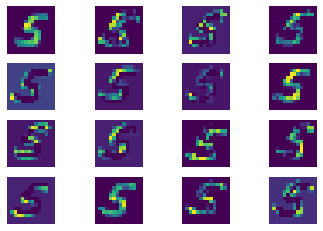

In [68]:
fig, axes = plt.subplots(4, 4)

def profile(model):
    
    device = torch.device('cuda')
    model = model.to(device)
    
    with torch.no_grad():
        for images, labels in test_loader:
            for i in range(0, len(images)):
                image = images[i]
                
                # axes[0,0].imshow(image.reshape(28, 28))
                
                # (16 x 14 x 14)
                out1 = model.layer1(image.reshape(-1, 1, 28, 28).to(device).float()).cpu()
            
                for i in range(0, 16):
                    axes[i // 4, i % 4].axis('off')
                    axes[i // 4, i % 4].imshow(out1[0][i])
                      
                
                return
            
profile(cnn)